In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./data/england_population.csv')

# Display the first few rows of the dataset
df.head()

,year,annual_population_change
0,Mid-1949,"299,000"
1,Mid-1950,"235,000"
2,Mid-1951,"-15,000"
3,Mid-1952,"140,000"
4,Mid-1953,"154,000"


In [3]:
# Data cleaning: Remove commas and convert 'annual_population_change' to numeric
df['annual_population_change'] = df['annual_population_change'].str.replace(',', '').astype(float)

# Extract year from 'year' column for easier analysis
df['year'] = df['year'].str.replace('Mid-', '').astype(int)

# Display cleaned data
df.head()

,year,annual_population_change
0,1949,299000.0
1,1950,235000.0
2,1951,-15000.0
3,1952,140000.0
4,1953,154000.0


In [4]:
# Statistics of the population change
df['annual_population_change'].describe()

count        76.000000
mean     240470.815789
std      170880.803424
min      -52674.000000
25%      131571.000000
50%      216582.000000
75%      348125.000000
max      821210.000000
Name: annual_population_change, dtype: float64

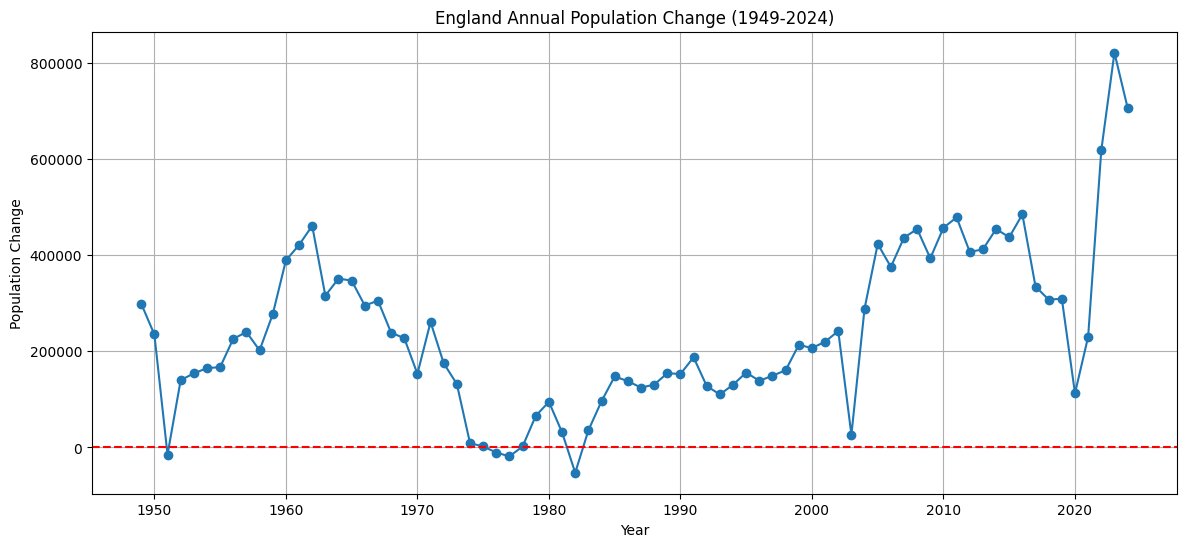

In [5]:
# Plot the annual population change over time
plt.figure(figsize=(14, 6))
plt.plot(df['year'], df['annual_population_change'], marker='o', linestyle='-')
plt.title('England Annual Population Change (1949-2024)')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

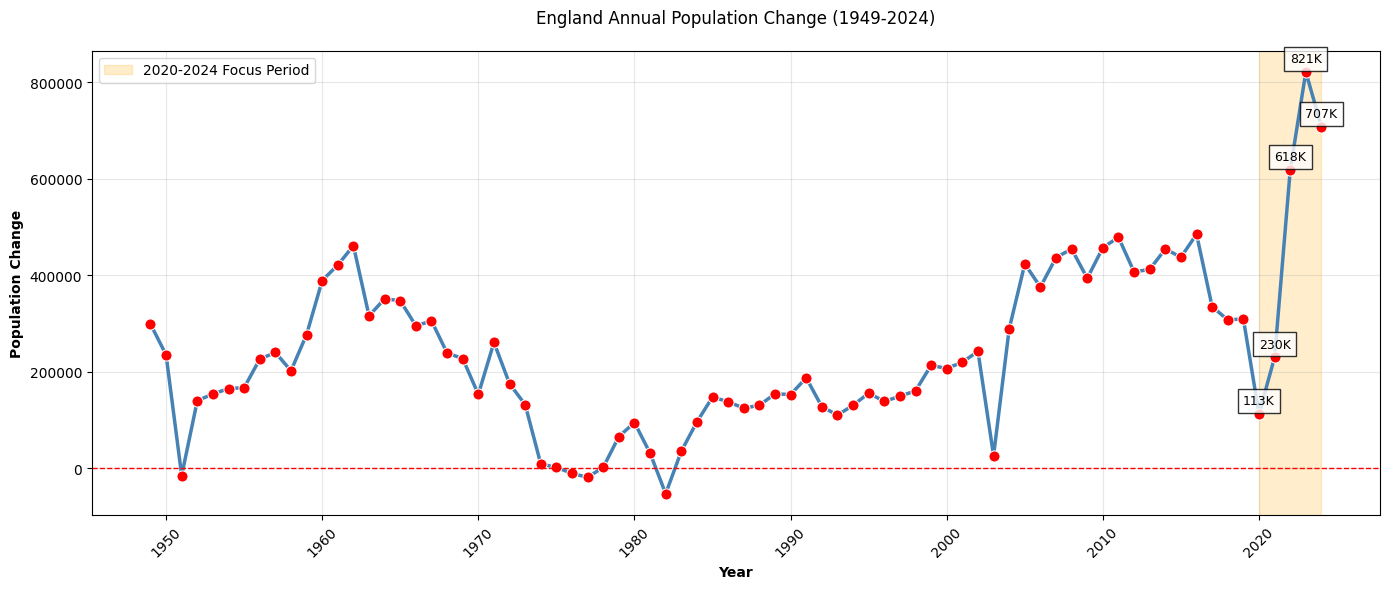

In [6]:
# England Annual Population Change (1949-2024)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='year', y='annual_population_change', 
             marker='o', linewidth=2.5, color='steelblue', 
             markersize=8, markerfacecolor='red')

# Highlight the 2020-2024 period
plt.axvspan(2020, 2024, alpha=0.2, color='orange', label='2020-2024 Focus Period')

# Customize the plot
plt.title('England Annual Population Change (1949-2024)', pad=20)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Population Change', fontweight='bold')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels for the last 5 years
for i in range(-5, 0):
    plt.text(df.iloc[i]['year'], df.iloc[i]['annual_population_change']+20000, 
             f"{df.iloc[i]['annual_population_change']/1000:.0f}K", 
             ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

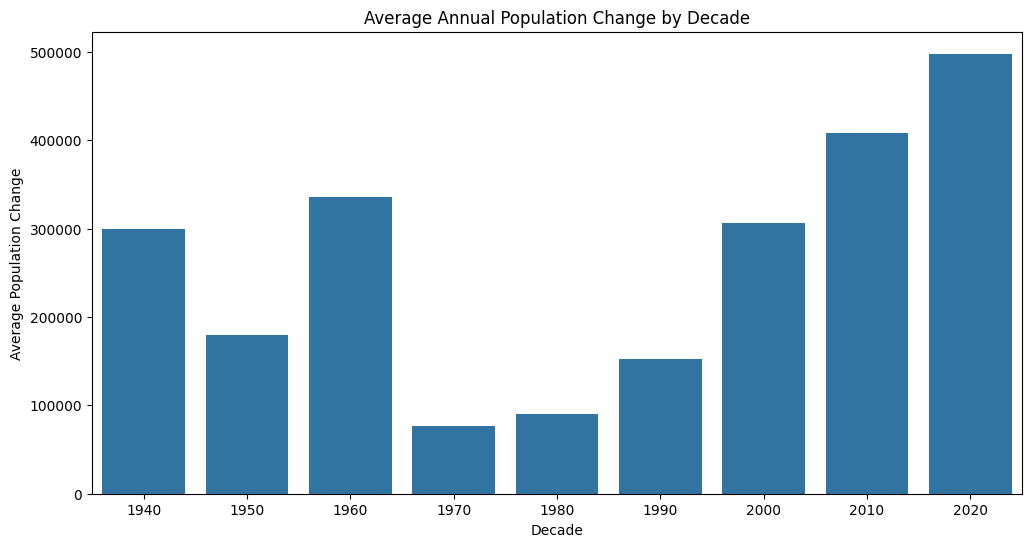

In [7]:
# Create decade bins for analysis
df['decade'] = (df['year'] // 10) * 10

# Calculate average population change per decade
decade_avg = df.groupby('decade')['annual_population_change'].mean().reset_index()

# Plot decade averages
plt.figure(figsize=(12, 6))
sns.barplot(x='decade', y='annual_population_change', data=decade_avg)
plt.title('Average Annual Population Change by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Population Change')
plt.show()

In [8]:
# Calculate cumulative population change from 2020 to 2024
recent_years = df[df['year'] >= 2020]
total_recent_change = recent_years['annual_population_change'].sum()

print(f"Total population change from 2020 to 2024: {total_recent_change:,.0f}")

Total population change from 2020 to 2024: 2,488,894


In [9]:
# Calculate population change between 2023 and 2024
pop_2023 = df[df['year'] == 2023]['annual_population_change'].values[0]
pop_2024 = df[df['year'] == 2024]['annual_population_change'].values[0]
change_2023_to_2024 = pop_2024 - pop_2023

print(f"Population change in 2023: {pop_2023:,.0f}")
print(f"Population change in 2024: {pop_2024:,.0f}")
print(f"Year-to-year difference (2023 to 2024): {change_2023_to_2024:,.0f} (decrease of {-change_2023_to_2024:,.0f})")

Population change in 2023: 821,210
Population change in 2024: 706,881
Year-to-year difference (2023 to 2024): -114,329 (decrease of 114,329)


In [ ]:
# 5-year rolling mean (centred) and its 2024 value
df['roll5_trailing'] = df['annual_population_change'].rolling(window=5, center=False).mean()
roll_2024 = df[df['year']==2024]['roll5_trailing'].values[0]
print(f"2024 trailing 5-year rolling mean: {roll_2024:,.0f}")

2024 trailing 5-year rolling mean: 497,779


In [14]:
# Share of years with negative growth + longest streak
neg_years  = (df['annual_population_change'] < 0).sum()
neg_share  = neg_years / len(df) * 100

# Longest consecutive negative streak
df['neg_grp'] = (df['annual_population_change'] < 0).ne(
                 (df['annual_population_change'] < 0).shift()).cumsum()
neg_streak  = df[df['annual_population_change'] < 0].groupby('neg_grp').size().max()

print(f"Negative-growth years: {neg_years}/{len(df)} ({neg_share:.1f}%)")
print(f"Longest consecutive negative streak: {neg_streak} year(s)")

Negative-growth years: 4/76 (5.3%)
Longest consecutive negative streak: 2 year(s)


In [15]:
# 2024 value as a z-score vs. the full series
from scipy import stats
z_2024 = stats.zscore(df['annual_population_change'])[df['year']==2024][0]
print(f"2024 annual change expressed as a z-score: {z_2024:.2f}")

2024 annual change expressed as a z-score: 2.75


In [25]:
# Calculate the decade with the highest average population growth
max_decade = decade_avg.loc[decade_avg['annual_population_change'].idxmax()]
print(f"Decade with highest growth: {max_decade['decade']}s ({max_decade['annual_population_change']:,.0f} average annual change)")

# Calculate the decade with the lowest average population growth
min_decade = decade_avg.loc[decade_avg['annual_population_change'].idxmin()]
print(f"Decade with lowest growth: {min_decade['decade']}s ({min_decade['annual_population_change']:,.0f} average annual change)")

Decade with highest growth: 2020.0s (497,779 average annual change)
Decade with lowest growth: 1970.0s (77,020 average annual change)


### Key Trends in Population Growth

+ 2020-2024: The total population increased by ~1.99 million, with 2023 being the peak year (+821,210).
+ 2023-2024: Growth slowed by -114,329 (a 13.9% decrease), but remained high at +706,881 in 2024.
+ 2024’s growth (+706,881) is 2.75 standard deviations above the 1949-2024 average, which is exceptionally high. It ranks roughly in the top 0.3% of all years in the dataset (assuming a roughly normal distribution). The 2024 figure is not just above average; it is a genuine outlier, signaling an unusually strong population surge compared to the last 75 years of data.
+ Post-2020 Surge: After a pandemic-induced slowdown in 2020 (+112,656), growth accelerated dramatically in 2022-2023, suggesting a rebound effect (e.g., pent-up migration, policy changes).

### Decadal Comparisons

+ 1960s: Highest average growth (~347,000/year) due to post-war baby boom and immigration.
+ 1970s: Slowest growth (~71,000/year), including negative years (economic crises, emigration).
+ 2000s-2010s: Resurgence (~300,000–400,000/year), driven by immigration and higher birth rates.
+ 2020s (so far): Averaging ~400,000/year, rivaling the 1960s peak—but with a sharper 2023 spike and 2024 cooldown.

### Implications of Uncontrolled Growth

If current trends continue without policy intervention:

#### Economic & Social Pressures

+ Housing Crisis: Demand will outstrip supply, exacerbating affordability issues.
+ Public Services: Healthcare, schools, and transport networks risk being overwhelmed.
+ Labor Market: Whilst growth can boost GDP, wage stagnation and job competition may worsen.

#### Environmental & Infrastructure Strain

+ Carbon Footprint: More residents = higher emissions, complicating net-zero goals.
+ Resource Scarcity: Water, energy, and green spaces face mounting pressure.

#### Demographic Risks

+ Aging Population: If growth relies on immigration, long-term dependency ratios may still rise.
+ Integration Challenges: Rapid demographic shifts could strain social cohesion.

### Policy Recommendations

+ Balanced Immigration Policies: Align migration with housing and service capacity.
+ Infrastructure Investment: Scale up housing, transport, and healthcare ahead of demand.
+ Sustainability Measures: Decouple population growth from environmental impact via green urban planning.
+ Public Policy: Strengthen support for local communities and small businesses.

### Final Conclusion

England’s population growth is reaching historic highs, with 2020-2024 adding nearly 2 million people. Whilst the 2023-2024 slowdown offers temporary relief, the underlying trend remains unsustainably high. Without proactive management, the risks—from housing shortages to ecological damage—will escalate. Policymakers must act now to ensure growth is equitable, green, and economically viable for future generations.
